In [158]:
import pandas as pd

In [159]:
jobs = pd.read_json("./jobs.json", lines=True)
#jobs = pd.concat([jobs1, jobs2, jobs3, existing_data], ignore_index=True)
jobs.shape

(441, 30)

In [160]:
print(jobs.columns.tolist())

['site', 'job_url', 'job_url_direct', 'title', 'company', 'location', 'job_type', 'date_posted', 'interval', 'min_amount', 'max_amount', 'currency', 'is_remote', 'emails', 'description', 'company_url', 'company_url_direct', 'company_addresses', 'company_industry', 'company_num_employees', 'company_revenue', 'company_description', 'logo_photo_url', 'banner_photo_url', 'ceo_name', 'ceo_photo_url', 'num_urgent_words', 'benefits', 'id', 'full_description']


In [162]:
pd.set_option('display.max_columns', None)  # Ensure all columns are shown
pd.set_option('display.expand_frame_repr', False) 
jobs.head(2)

,site,job_url,job_url_direct,title,company,location,job_type,date_posted,interval,min_amount,max_amount,currency,is_remote,emails,description,company_url,company_url_direct,company_addresses,company_industry,company_num_employees,company_revenue,company_description,logo_photo_url,banner_photo_url,ceo_name,ceo_photo_url,num_urgent_words,benefits,id,full_description
0,glassdoor,https://www.glassdoor.com/job-listing/j?jl=100...,None,Senior .NET/C# Developer (Open to Remote),Penguin Random House LLC,United States,None,1711756800000,yearly,130000.0,135000.0,USD,0.0,None,Penguin Random House is on the lookout for a s...,https://www.glassdoor.com/Overview/W-EI_IE7434...,None,None,None,None,None,None,None,None,None,None,NaN,NaN,0,Senior .NET/C# Developer (Open to Remote) Peng...
1,glassdoor,https://www.glassdoor.com/job-listing/j?jl=100...,None,REMOTE - Sr. Software Test Engineer,Harbor Compliance,None,None,1711756800000,None,NaN,NaN,None,1.0,None,The Software Test Engineer is a key member of ...,https://www.glassdoor.com/Overview/W-EI_IE1479...,None,None,None,None,None,None,None,None,None,None,NaN,NaN,1,REMOTE - Sr. Software Test Engineer The Softwa...


In [163]:
df = jobs[['id', 'title', 'interval', 'min_amount', 'max_amount', 'currency', 'full_description']]
df.head(2)

,id,title,interval,min_amount,max_amount,currency,full_description
0,0,Senior .NET/C# Developer (Open to Remote),yearly,130000.0,135000.0,USD,Senior .NET/C# Developer (Open to Remote) Peng...
1,1,REMOTE - Sr. Software Test Engineer,None,NaN,NaN,None,REMOTE - Sr. Software Test Engineer The Softwa...


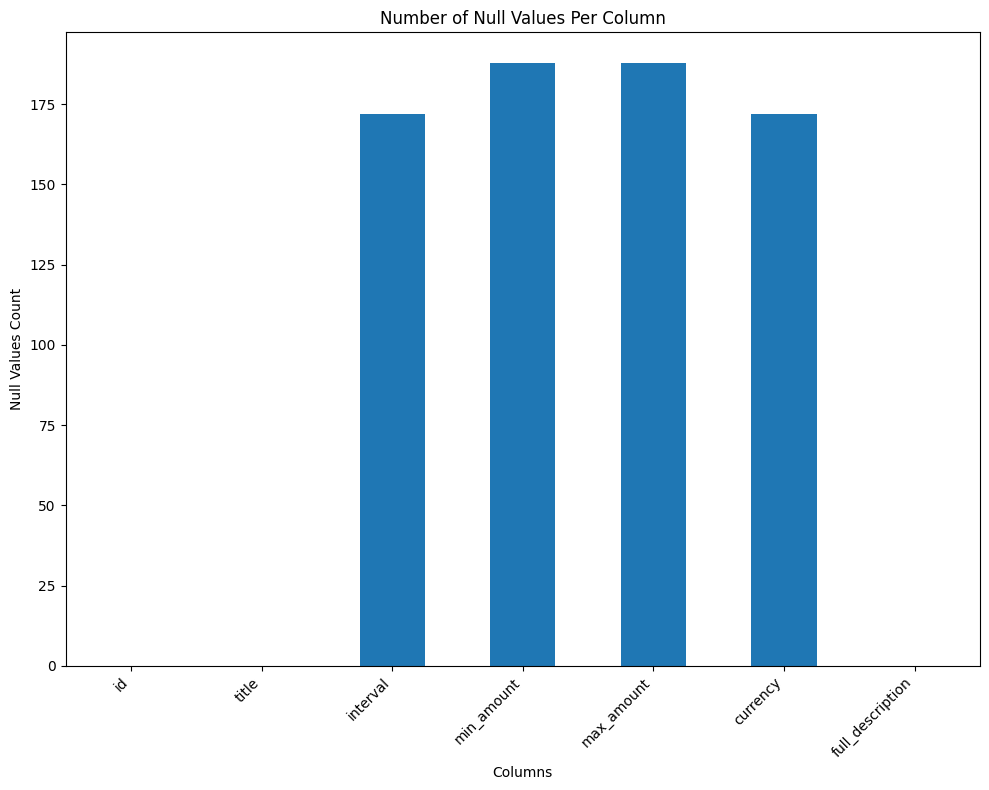

In [164]:
import matplotlib.pyplot as plt
null_counts = df.isnull().sum()
# Plotting
plt.figure(figsize=(10, 8))  # Adjust the size as needed
null_counts.plot(kind='bar')
plt.title('Number of Null Values Per Column')
plt.xlabel('Columns')
plt.ylabel('Null Values Count')
plt.xticks(rotation=45, ha="right")  # Rotate column names for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated column names
plt.show()

In [165]:
df['interval'].unique()

array(['yearly', None, 'hourly', 'monthly'], dtype=object)

In [169]:
interval_not_null = df['interval'].notnull()
min_null = df['min_amount'].isnull()
max_null = df['max_amount'].isnull()

condition = interval_not_null & (min_null & max_null)
print(condition)
df = df[~condition]

interval_null = df['interval'].isnull()

min_not_null = df['min_amount'].notnull()
max_not_null = df['max_amount'].notnull()

condition = interval_not_null & (min_null | max_null)
print(condition)
df = df[~condition]

0      False
1      False
2      False
3      False
4      False
       ...  
436    False
437    False
438    False
439    False
440    False
Length: 441, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
436    False
437    False
438    False
439    False
440    False
Length: 441, dtype: bool


C:\Users\bouch\AppData\Local\Temp\ipykernel_16520\3403804119.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~condition]


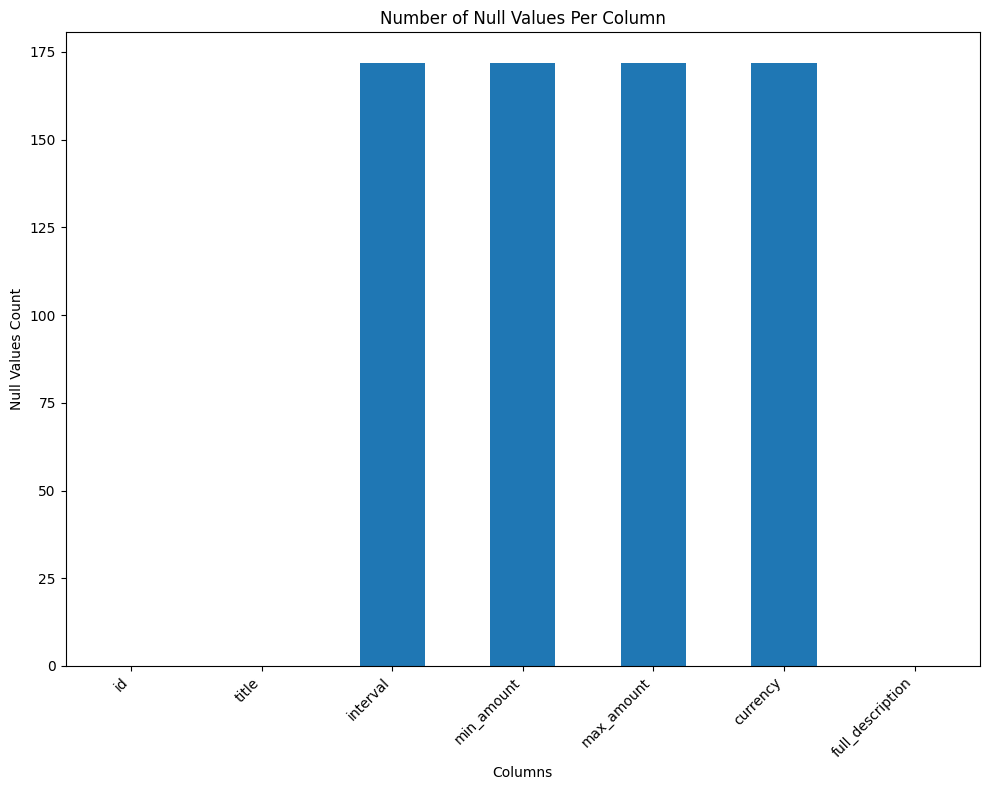

In [171]:
import matplotlib.pyplot as plt
null_counts = df.isnull().sum()
# Plotting
plt.figure(figsize=(10, 8))  # Adjust the size as needed
null_counts.plot(kind='bar')
plt.title('Number of Null Values Per Column')

plt.xlabel('Columns')
plt.ylabel('Null Values Count')
plt.xticks(rotation=45, ha="right")  # Rotate column names for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated column names
plt.show()

In [172]:
df['currency'].unique()

array(['USD', None], dtype=object)

In [173]:
df.drop(columns=['currency'], inplace=True)

In [174]:
hourly_to_annual_factor = 40 * 52
df.loc[df['interval'] == 'hourly', 'min_amount'] *= hourly_to_annual_factor
df.loc[df['interval'] == 'hourly', 'max_amount'] *= hourly_to_annual_factor

monthly_to_annual_factor = 12
df.loc[df['interval'] == 'monthly', 'min_amount'] *= monthly_to_annual_factor
df.loc[df['interval'] == 'monthly', 'max_amount'] *= monthly_to_annual_factor

df.drop(columns=['interval'], inplace=True)
df.head(5)

,id,title,min_amount,max_amount,full_description
0,0,Senior .NET/C# Developer (Open to Remote),130000.0,135000.0,Senior .NET/C# Developer (Open to Remote) Peng...
1,1,REMOTE - Sr. Software Test Engineer,NaN,NaN,REMOTE - Sr. Software Test Engineer The Softwa...
2,2,Golang Developer,110727.0,135327.0,"Golang Developer Overall, 6-10Go Lang experien..."
3,3,Software Development Engineer In Test (SEDT),NaN,NaN,Software Development Engineer In Test (SEDT) *...
4,4,Outlook Add-In (C#) Developer,50573.0,79932.0,Outlook Add-In (C#) Developer **Requisition Nu...


In [209]:
import torch
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline

In [228]:
QA_input = [{'question':'How many years of experience?',
             'content': 'Website Developer. We want our canditites to have 2 years of java experience, 8 years of manager experience and four years of industry experience'}]

In [229]:
model_name = 'deepset/roberta-base-squad2'

In [230]:
model = AutoModelForQuestionAnswering.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [231]:
input = tokenizer(QA_input[0]['question'], QA_input[0]['content'], return_tensors="pt")
output = model(**input)

In [232]:
print(output)

QuestionAnsweringModelOutput(loss=None, start_logits=tensor([[ 3.4031, -9.1553, -9.2086, -9.6430, -9.4488, -9.5525, -9.8723, -6.6974,
         -9.4490, -7.0421, -8.1904, -6.6983, -7.9067, -6.4320, -8.1696, -6.7876,
         -8.9630, -9.4231, -7.2640, -7.3776, -0.2977, -6.8200, -8.7708, -6.4571,
         -6.8571, -9.2256, -1.7738, -7.5132, -9.0116, -6.9008, -7.8191, -8.8614,
         -1.4660, -7.9600, -9.0914, -6.6945, -7.4375, -6.6961]],
       grad_fn=<CloneBackward0>), end_logits=tensor([[ 3.8905, -8.5450, -8.3887, -7.9143, -8.2647, -7.9156, -7.9220, -3.2281,
         -8.5003, -8.6882, -5.3726, -3.2290, -9.0052, -9.0180, -9.0032, -9.0305,
         -8.5309, -7.0583, -8.8748, -8.8584, -0.2581, -1.4600, -5.3815, -3.6310,
         -0.9992, -6.5145, -1.8114, -3.2222, -6.8414, -5.3060, -2.7739, -7.8457,
         -1.2819, -4.1789, -6.8173, -5.3180, -1.7480, -3.2266]],
       grad_fn=<CloneBackward0>), hidden_states=None, attentions=None)


In [233]:
start = torch.argmax(output.start_logits)
end = torch.argmax(output.end_logits)
print(start)
print(end)

token = input.input_ids[0, start:end+1]
answer = tokenizer.decode(token)
print(answer)

tensor(0)
tensor(0)
<s>


In [182]:
df.to_json('./sample.json', orient='records', lines=True)

In [155]:
pip install spacy


  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/12.1 MB 1.3 MB/s eta 0:00:10
    --------------------------------------- 0.2/12.1 MB 2.3 MB/s eta 0:00:06
   - -------------------------------------- 0.5/12.1 MB 3.4 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/12.1 MB 5.3 MB/s eta 0:00:03
   ----- ---------------------------------- 1.8/12.1 MB 7.6 MB/s eta 0:00:02
   ------ --------------------------------- 1.9/12.1 MB 8.1 MB/s eta 0:00:02
   --------- ------------------------------ 2.9/12.1 MB 10.4 MB/s eta 0:00:01
   ---------- ----------------------------- 3.2/12.1 MB 9.1 MB/s eta 0:00:01
   -------------- ------------------------- 4.4/12.1 MB 10.3 MB/s eta 0:00:01
   --------------- ------------------------ 4.6/12.1 MB 9.7 MB/s eta 0:00:01
   ----------------- ---------------------- 5.3/12.1 MB 10.3 MB/s eta 0:00:01
   ---------------

In [156]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Example sentence
sentence = "Candidates must have 5 years of programming experience."

# Process the sentence
doc = nlp(sentence)

# Iterate over the entities
for ent in doc.ents:
    if ent.label_ == "DATE":
        print(f"Found a date entity: {ent.text}")


OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.